# Machine Learning with TensorFlow: House Price Prediction

In [1]:
# Importing a library for mathematical operations.

import numpy as np

# Importing a library for data manipulation.

import pandas as pd

# Importing a library for data visualization.

import matplotlib.pyplot as plt

# Importing libraries for machine learning.

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.callbacks import EarlyStopping

## Data Collection

In [2]:
# Reading data into a Pandas DataFrame.

data = pd.read_csv("Data.csv", names=["Serial", "Date", "Age", "Distance", "Stores", "Latitude", "Longitude", "Price"])

In [3]:
# Printing first five rows of data.

data.head()

,Serial,Date,Age,Distance,Stores,Latitude,Longitude,Price
0,0,2009,21,9,6,84,121,14264
1,1,2007,4,2,3,86,121,12032
2,2,2016,18,3,7,90,120,13560
3,3,2002,13,2,2,80,128,12029
4,4,2014,25,5,8,81,122,14157


## Data Cleaning

In [4]:
# Printing number of missing values in each column.

data.isna().sum()

Serial       0
Date         0
Age          0
Distance     0
Stores       0
Latitude     0
Longitude    0
Price        0
dtype: int64

In [5]:
# Dropping Serial column.

data.drop("Serial", axis=1, inplace=True)

## Data Normalization

In [6]:
# Assigning normalized data into a Pandas DataFrame.

data_normalized = (data - data.mean()) / data.std()

In [7]:
# Printing first five rows of normalized data.

data_normalized.head()

,Date,Age,Distance,Stores,Latitude,Longitude,Price
0,0.015978,0.181384,1.257002,0.345224,-0.307212,-1.260799,0.350088
1,-0.350485,-1.319118,-0.930610,-0.609312,0.325301,-1.260799,-1.836486
2,1.298598,-0.083410,-0.618094,0.663402,1.590328,-1.576456,-0.339584
3,-1.266643,-0.524735,-0.930610,-0.927491,-1.572238,0.948803,-1.839425
4,0.932135,0.534444,0.006938,0.981581,-1.255981,-0.945141,0.245266


## Feature Selection

In [8]:
# Assigning feature matrix.

X = data_normalized.iloc[:, :6].values

# Assigning target vector.

y = data_normalized.iloc[:, 6].values

In [9]:
# Printing feature matrix shape.

print("Feature Matrix Shape:", X.shape)

# Printing target vector shape.

print("Target Vector Shape:", y.shape)

Feature Matrix Shape: (5000, 6)
Target Vector Shape: (5000,)


## Machine Learning

In [10]:
# Splitting data into random train and test subsets.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [11]:
# Building a Sequential model.

model = Sequential()

# Instantiating a Keras tensor.

model.add(Input(shape=(6,)))

# Adding densely connected neural network layers.

model.add(Dense(10, activation="relu"))
model.add(Dense(15, activation="relu"))
model.add(Dense(20, activation="relu"))
model.add(Dense(1))

In [12]:
# Configuring model for training.

model.compile(optimizer="adam", loss="mse")

In [13]:
# Printing a summary of neural network.

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            70 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 15)             │           165 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 20)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 576 (2.25 KB)

 Trainable params: 576 (2.25 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
# Stopping training when a monitored metric stops improving.

early_stopping = EarlyStopping(patience=5)

In [15]:
# Generating output predictions on untrained model.

y_prediction_untrained = model.predict(X_test)

52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [16]:
# Training model for a fixed number of epochs.

history = model.fit(X_train, y_train, epochs=100, callbacks=early_stopping, validation_data=(X_test, y_test))

Epoch 1/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8401 - val_loss: 0.4207
Epoch 2/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 984us/step - loss: 0.3239 - val_loss: 0.2400
Epoch 3/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 971us/step - loss: 0.2060 - val_loss: 0.2067
Epoch 4/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 955us/step - loss: 0.1860 - val_loss: 0.1972
Epoch 5/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 990us/step - loss: 0.1746 - val_loss: 0.1897
Epoch 6/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 966us/step - loss: 0.1667 - val_loss: 0.1850
Epoch 7/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 976us/step - loss: 0.1670 - val_loss: 0.1807
Epoch 8/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 962us/step - loss: 0.1622 - val_loss: 0.1781
Epoch 9/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 980us/step - loss: 0.1603 - val_loss: 0.1760
Epoch 10/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1543 - val_loss: 0.1770
Epoch 11/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1574 - val_loss: 0.1751
Epoch 12/100
105/105 ━━━━

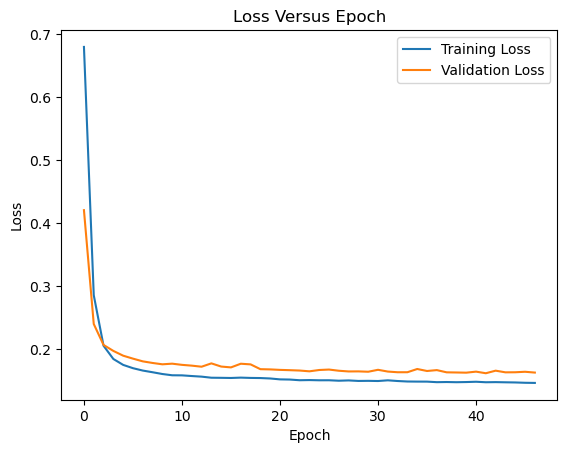

In [17]:
# Plotting a line plot for loss versus epoch.

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Loss Versus Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Training Loss", "Validation Loss"])
plt.show()

In [18]:
# Generating output predictions on trained model.

y_prediction_trained = model.predict(X_test)

52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 567us/step


In [19]:
# Printing accuracy score.

print("Accuracy Score: ", 1 - model.evaluate(X_test, y_test))

# Printing R^2 regression score.

print("R^2 Score: ", r2_score(y_test, y_prediction_trained))

# Printing mean absolute error.

print("Mean Absolute Error: ", mean_absolute_error(y_test, y_prediction_trained))

# Printing mean absolute percentage error.

print("Mean Absolute Percentage Error: ", mean_absolute_percentage_error(y_test, y_prediction_trained))

# Printing mean squared error.

print("Mean Squared Error: ", mean_squared_error(y_test, y_prediction_trained))

# Printing root mean squared error.

print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test, y_prediction_trained)))

52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 489us/step - loss: 0.1647
Accuracy Score:  0.8371636420488358
R^2 Score:  0.8405118701966499
Mean Absolute Error:  0.3450933516838834
Mean Absolute Percentage Error:  1.762784876381836
Mean Squared Error:  0.1628363646344057
Root Mean Squared Error:  0.4035298807206298


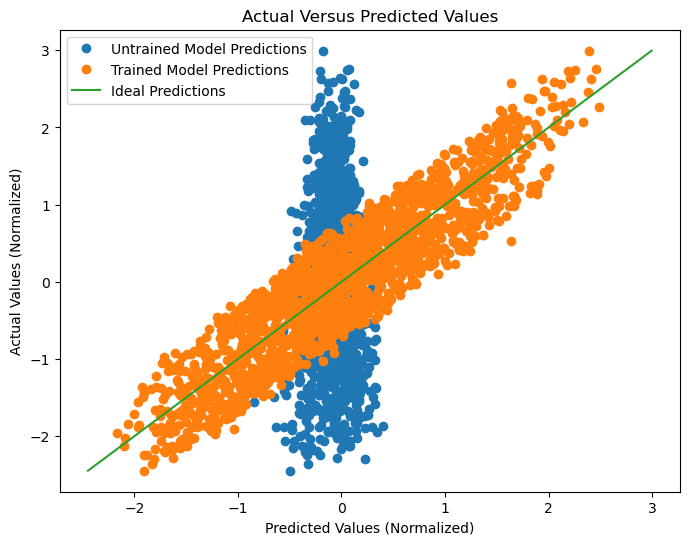

In [20]:
# Plotting a scatter plot for actual versus predicted values.

plt.figure(figsize=(8, 6))
plt.plot(y_prediction_untrained, y_test, "o", label="Untrained Model Predictions")
plt.plot(y_prediction_trained, y_test, "o", label="Trained Model Predictions")
minimum = min(min(y_prediction_untrained), min(y_prediction_trained), min(y_test))
maximum = max(max(y_prediction_untrained), max(y_prediction_trained), max(y_test))
plt.plot([minimum, maximum], [minimum, maximum], label="Ideal Predictions")
plt.title("Actual Versus Predicted Values")
plt.xlabel("Predicted Values (Normalized)")
plt.ylabel("Actual Values (Normalized)")
plt.legend()
plt.show()

In [21]:
# Defining a function to unnormalize data.

def unnormalize(value, column):
    
    return value * data[column].std() + data[column].mean()

In [22]:
# Unnormalizing untrained model predicted values to original representation.

y_prediction_untrained_original = [unnormalize(value, "Price") for value in y_prediction_untrained]

# Unnormalizing trained model predicted values to original representation.

y_prediction_trained_original = [unnormalize(value, "Price") for value in y_prediction_trained]

# Unnormalizing actual values to original representation.

y_test_original = [unnormalize(value, "Price") for value in y_test]

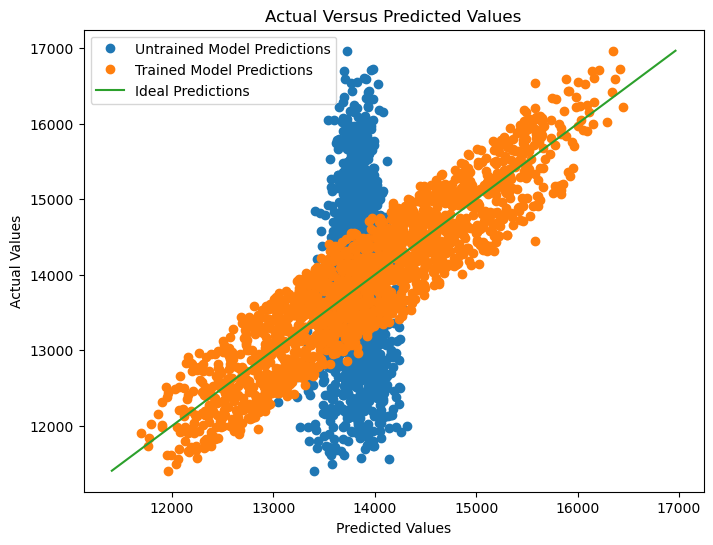

In [23]:
# Plotting a scatter plot for actual versus predicted values.

plt.figure(figsize=(8, 6))
plt.plot(y_prediction_untrained_original, y_test_original, "o", label="Untrained Model Predictions")
plt.plot(y_prediction_trained_original, y_test_original, "o", label="Trained Model Predictions")
minimum = min(min(y_prediction_untrained_original), min(y_prediction_trained_original), min(y_test_original))
maximum = max(max(y_prediction_untrained_original), max(y_prediction_trained_original), max(y_test_original))
plt.plot([minimum, maximum], [minimum, maximum], label="Ideal Predictions")
plt.title("Actual Versus Predicted Values")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.legend()
plt.show()